## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [3]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions = pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)
show(DF_dates)
show(DF_professions)
show(DF_works)

**Q1** Are each of these data sets Tidy?

**Q2** Do they all contain the same number of observations?

**Q3** What are the five variables?

**Q4** What variable do they have in common - what can we join **on**

Q1 The three data sets are tidy because every variable has specific categorical data.

Q2 The three data sets don't all contain the same number of observations. The first data set has 8 observations, the second data set has 10 observations, and the third data set has 9 observations.

Q3 The five variables in all three of these data sets are 'name', 'birth_year', 'death_year', 'profession', and 'known_for'.

Q4 The one variable that all three data sets have in common (the only thing we can join on) is 'name'.

## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [5]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='left')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='left')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Ada Lovelace,Mathematician,first computer algorithm,NaN,NaN
1,Marie Curie,Physicist and Chemist,"theory of radioactivity, discovery of element...",NaN,NaN
2,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0
3,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0
4,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0
5,Rosalind Franklin,Chemist,NaN,1920.0,1958.0
6,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0
7,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN
8,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN
9,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN


**Q5** What, if anything, would change if you switched to how='right'?

In [7]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='right')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='right')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0
3,Rosalind Franklin,NaN,NaN,1920,1958.0
4,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN


When I switched the how='right' from how='left' the first two names, Ada Lovelace and Marie Curie, were earased. This would be because it only counted the data that was on the right side of the set.

## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [9]:
DF_6 = pd.merge(DF_professions,DF_dates,on='name',how='inner')
DF_6

,name,profession,birth_year,death_year
0,Janaki Ammal,Botanist,1897,1984.0
1,Chien-Shiung Wu,Physicist,1912,1997.0
2,Katherine Johnson,Mathematician,1918,2020.0
3,Rosalind Franklin,Chemist,1920,1958.0
4,Vera Rubin,Astronomer,1928,2016.0
5,Gladys West,Mathematician,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,1947,NaN
7,Jennifer Doudna,Biochemist,1964,NaN


## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [11]:
# only the professions and works are merged
DF_7 = pd.merge(DF_professions,DF_works,on='name',how='right')
DF_7
# merge with dates
DF_7 = pd.merge(DF_scientists,DF_dates,on='name',how='right',indicator=True)
DF_7
# mask to only keep rows where _merge is set to ‘both’ (I'm lost on the '_merge' part
mask = DF_7['_merge']=='both'
DF_7 = DF_7[mask]
DF_7

,name,profession,known_for,birth_year_x,death_year_x,birth_year_y,death_year_y,_merge
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0,1897,1984.0,both
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0,1912,1997.0,both
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0,1918,2020.0,both
3,Rosalind Franklin,NaN,NaN,1920,1958.0,1920,1958.0,both
4,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0,1928,2016.0,both
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN,1930,NaN,both
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN,1947,NaN,both
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN,1964,NaN,both


## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [13]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
show(DF_purchases)
show(DF_prices)

## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [27]:
# "how=outer"
DF_total = pd.merge(DF_purchases, DF_prices,on='item',how='outer')
DF_total

,customer_id,item,price
0,NaN,avocado,0.50
1,1.0,banana,0.15
2,1.0,bread,1.00
3,1.0,milk,0.80
4,2.0,milk,0.80
5,2.0,toilet paper,3.00


In [65]:
# "how=inner"/customer id together
DF_some = pd.merge(DF_purchases,DF_prices,on='item',how='inner')
DF_some

,customer_id,item,price
0,1,bread,1.00
1,1,milk,0.80
2,1,banana,0.15
3,2,milk,0.80
4,2,toilet paper,3.00


In [39]:
# "how=right"/total
DF_right = pd.merge(DF_purchases,DF_prices,on='item',how='right')
DF_right

,customer_id,item,price
0,NaN,avocado,0.50
1,1.0,banana,0.15
2,1.0,bread,1.00
3,1.0,milk,0.80
4,2.0,milk,0.80
5,2.0,toilet paper,3.00


In [63]:
# "how=left"/customer id together
DF_left = pd.merge(DF_purchases,DF_prices,on='item',how='left')
DF_left

,customer_id,item,price
0,1,bread,1.00
1,1,milk,0.80
2,1,banana,0.15
3,2,milk,0.80
4,2,toilet paper,3.00


In [59]:
# total revenue (price)
DF_total['price'].sum()

6.25

**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [61]:
# Your code here
DF_total['customer_id'].sum()

7.0

# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [368]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [370]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [372]:
#variable
print(len(DF_raw.columns))

21


In [374]:
#observation
print(len(DF_raw))

173


The variables are both numerical and categorical since some of the data are numbers while others are not numbers.

This data set has 21 variables (columns) and 173 observations (rows) with numerical and categorical data alike.

In [376]:
DF_raw.keys()

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [218]:
# major with the lowest unemployment rate
my_variables = ['Major','Unemployment_rate','Total','Major_category']
DF_raw = DF_raw[my_variables]
show(DF_raw)

In [220]:
# major with the highest percentage of women
my_columns = ['Major',
              #'Women',
              'Major_category']
              #'ShareWomen','Employed']
DF_raw = DF_raw[my_columns]
show(DF_raw)
# IDK why those three variables aren't working

In [320]:
variables = ['Major_category',
             #'Median',
             'Major']
             #'Total']
DF_raw = DF_raw[variables]
show(DF_raw)
#IDK why the "median" variable didn't work

In [257]:
# Distributions of medican income compare across major categories
#value count on what major categories are in the data, what categories are most or least represented
DF_raw['Major_category'].value_counts()


Major_category
Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Agriculture & Natural Resources        10
Social Science                          9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: count, dtype: int64

In [298]:
# DF_raw['Median'].value_counts() WHY DOES IT NOT WORK
counts = DF_raw['Major_category'].value_counts()
show(counts)

In [303]:
#summary statistics using the .group_by() command to see the statistics for each major category
DF_raw.groupby(by=['Major_category']).describe()

Major         \
                                    count unique   
Major_category                                     
Agriculture & Natural Resources        10     10   
Arts                                    8      8   
Biology & Life Science                 14     14   
Business                               13     13   
Communications & Journalism             4      4   
Computers & Mathematics                11     11   
Education                              16     16   
Engineering                            29     29   
Health                                 12     12   
Humanities & Liberal Arts              15     15   
Industrial Arts & Consumer Services     7      7   
Interdisciplinary                       1      1   
Law & Public Policy                     5      5   
Physical Sciences                      10     10   
Psychology & Social Work                9      9   
Social Science                          9      9   

                                                                               \
                                                                          top   
Major_category                                                                  
Agriculture & Natural Resources                                  FOOD SCIENCE   
Arts                                                  MISCELLANEOUS FINE ARTS   
Biology & Life Science                                           PHARMACOLOGY   
Business                                                    ACTUARIAL SCIENCE   
Communications & Journalism                                    COMMUNICATIONS   
Computers & Mathematics                                      COMPUTER SCIENCE   
Education                                           SCHOOL STUDENT COUNSELING   
Engineering                                             PETROLEUM ENGINEERING   
Health                                                                NURSING   
Humanities & Liberal Arts                               UNITED STATES HISTORY   
Industrial Arts & Consumer Services                     CONSTRUCTION SERVICES   
Interdisciplinary                             MULTI/INTERDISCIPLINARY STUDIES   
Law & Public Policy                                           COURT REPORTING   
Physical Sciences                                  ASTRONOMY AND ASTROPHYSICS   
Psychology & Social Work             INDUSTRIAL AND ORGANIZATIONAL PSYCHOLOGY   
Social Science                                                      ECONOMICS   

                                          
                                    freq  
Major_category                            
Agriculture & Natural Resources        1  
Arts                                   1  
Biology & Life Science                 1  
Business                               1  
Communications & Journalism            1  
Computers & Mathematics                1  
Education                              1  
Engineering                            1  
Health                                 1  
Humanities & Liberal Arts              1  
Industrial Arts & Consumer Services    1  
Interdisciplinary                      1  
Law & Public Policy                    1  
Physical Sciences                      1  
Psychology & Social Work               1  
Social Science                         1

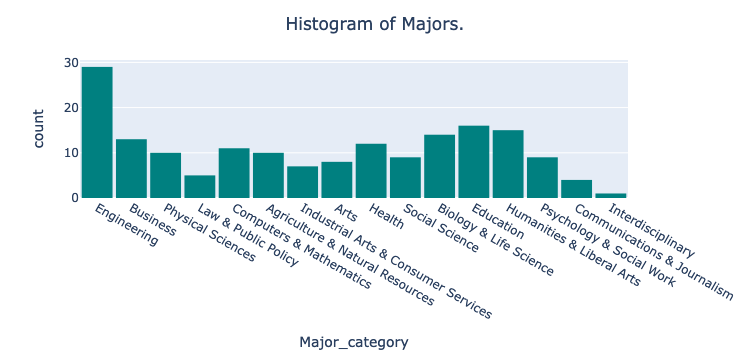

In [326]:
#Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
fig = px.histogram (DF_raw,
                   nbins=16,
                   x='Major_category',
                   color_discrete_sequence=['teal'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Majors.',
                  title_x=0.5)
fig.show()

fig = px.histogram(DF_raw,
            x='Major_category',
            color='Median')
fig.update_traces(dict(marker_line_width=0))

fig.update_layout(title='Median income for each Major',
                  title_x=0.5,
                  xaxis_title="Majors",
                  yaxis_title="Median Income",
                  autosize=False,)
fig.show()
#"Median" didn't work

We choose the median rather than the mean the descrive the typcial income of a group of people a possible outlier can ruin the data.

Which major category has the highest typical (you'll need to decide what this means) median income?
Answer - I don't know

I can't explain because a lot of the variables that I tried to use weren't "in the index" so I got extremly confused.

### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [364]:
#Create DataFrame


In [22]:
#

In [23]:
#

**(Click Here to Explain your Results)**

### 4. Ask a question of interest to you.

In [24]:
#

**(Click Here to Explain your Results)**